In [136]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
os.listdir()
os.chdir('/Users/CHRIS/Downloads/datasets/pumpkinCSV')

path = '/Users/CHRIS/Downloads/datasets/pumpkinCSV'
os.listdir(path)
files = [file for file in os.listdir(path)]
pumpkins = pd.concat(map(pd.read_csv, files), ignore_index=True)
pumpkins

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Appearance,Storage,Crop,Repack,Trans Mode,Offerings,Market Tone,Price Comment,Comments,Unnamed: 0
0,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,140.00,154.75,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,145.00,154.75,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.00,154.75,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.00,150.00,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,140.00,154.75,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509,PUMPKINS,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,09/30/2016,14.75,14.75,...,NaN,NaN,NaN,N,NaN,NaN,LOWER.,NaN,NaN,1752.0
3510,PUMPKINS,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,09/26/2016,275.00,275.00,...,NaN,NaN,NaN,N,NaN,NaN,LOWER.,NaN,NaN,1753.0
3511,PUMPKINS,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,09/27/2016,275.00,275.00,...,NaN,NaN,NaN,N,NaN,NaN,STEADY.,NaN,NaN,1754.0
3512,PUMPKINS,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,09/28/2016,275.00,275.00,...,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.,NaN,NaN,1755.0


In [152]:
new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

In [153]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month

In [154]:
new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year,  
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

KeyError: 'City Name'

In [148]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [149]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

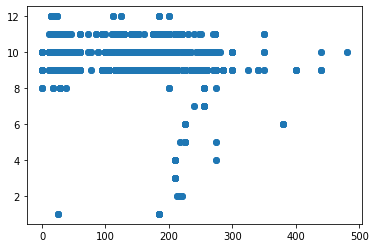

In [150]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()


Text(0, 0.5, 'Pumpkin Price')

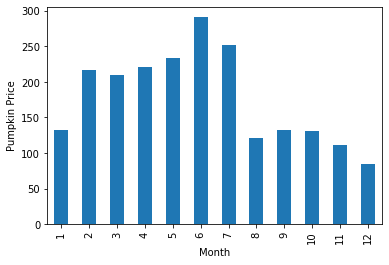

In [143]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")
